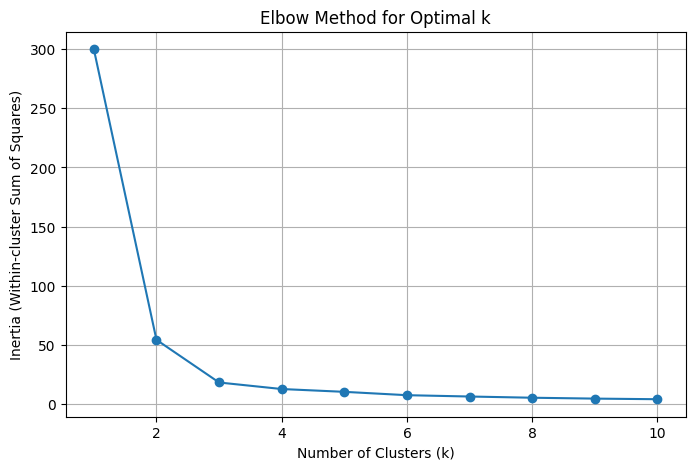

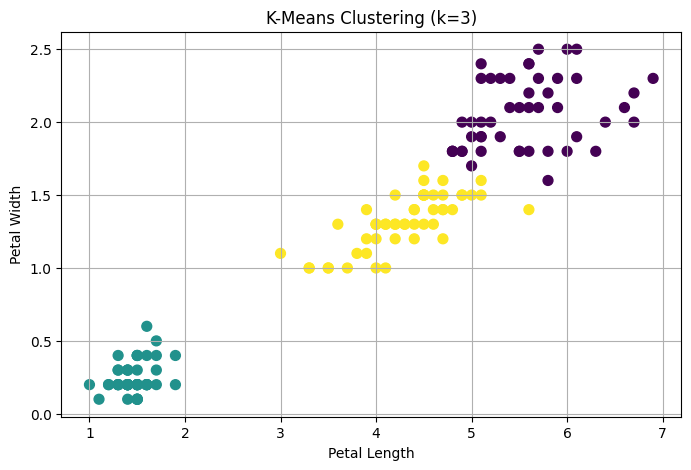

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('iris (4).csv')

# Use only 'petal length' and 'petal width' for clustering
X = df[['petal_length', 'petal_width']]

# Optional but recommended: Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method: find the optimal number of clusters
inertia = []

# Try k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to the nearest cluster center

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

optimal_k = 3  #optimal
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original data for inspection
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X['petal_length'], X['petal_width'], c=clusters, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid(True)
plt.show()